# House Price Prediction

# Abstract

The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.    

The Aim of the project is to build the best fitting model using linear regression and the best features.We will be predicting the house prices. 

Column Details:
- Date
- Price
- Bedrooms
- Bathrooms 
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- street
- city
- statezip
- country    

**Multi class Categorical values** - bedrooms, bathrooms   
**Binary categorical values** - Waterfront

# Part A - Linear model

## Imported the needed libraries

In [101]:
#importing needed libraries
%matplotlib inline 
import matplotlib.pyplot as plt #Visualisation
import numpy as np #Linear Algebra
import pandas as pd #Data processing
from scipy import stats #Numerical Routines
import seaborn as sns #Visualisation
import re
#Machine Learning Library
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pylab as pl
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

## Imported the dataset using pandas function

In [4]:
#import the dataset 
#Used read_csv function of pandas library to import the dataset and the decimal is used 
df = pd.read_csv("data.csv",sep = ',')
df.head() #used .head() function of pandas library to show first 5 rows of the dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Number of rows and columns

In [6]:
df.shape

(4600, 18)

There are 18 Columns and 4600 rows of data.

## Information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


This gives us the consise summary of the data.In the summary we can see the list of columns with its datatype and the count of non null values in the coulmns.

In [8]:
#street=df.street.unique()
df['bedrooms'].unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

We get the unique values for the bedrooms column.

In [9]:
df['bedrooms'].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

We get number of bedrooms in the dataframe. 

## Generated the descriptive statistics and EDA

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


This gives us the descriptive statistics of the data.

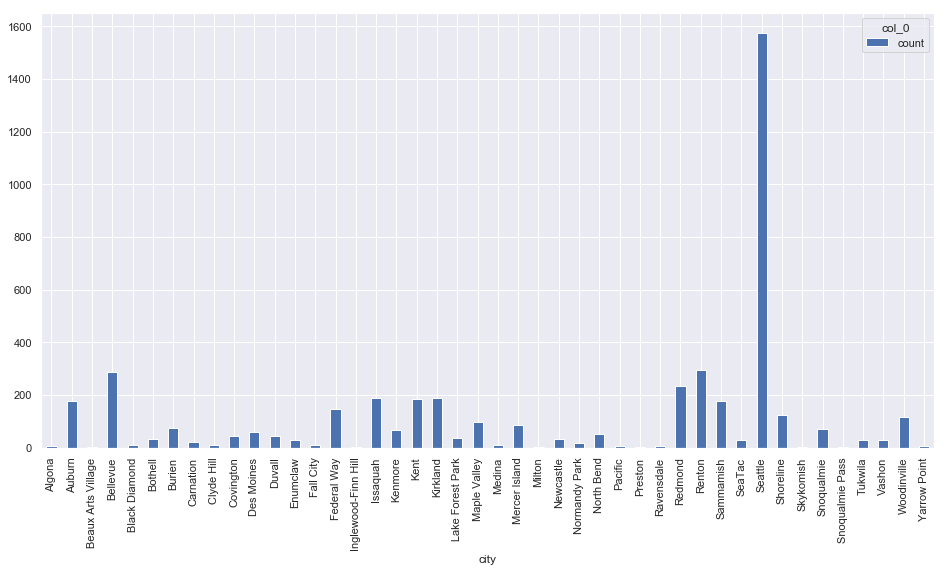

In [74]:
my_tab = pd.crosstab(index = df["city"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

**Seattle city has most values for house prediction**

Text(0.5, 1.0, 'City vs price')

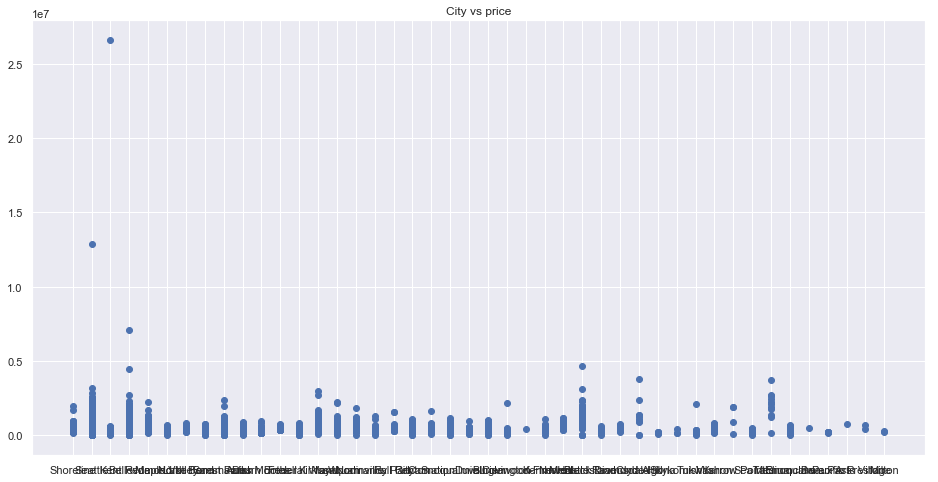

In [78]:
plt.scatter(df.city,df.price)
plt.title("City vs price")

**City does not have much effect on housing price.**    
**There are a few outliers.**

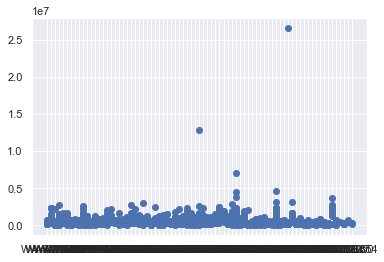

In [160]:
plt.scatter(df.statezip,df.price)
#plt.title("statezip vs price")

**Statezip has no effect on housing prices**

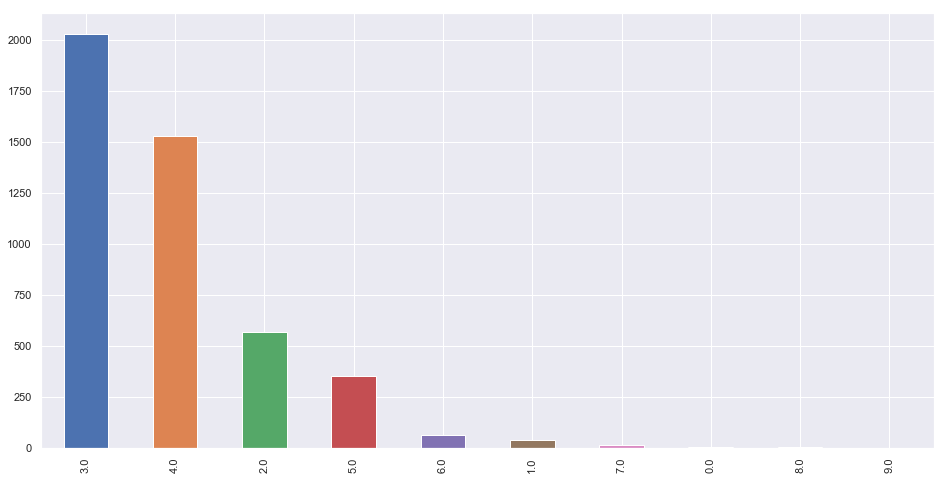

In [20]:
df["bedrooms"].value_counts().plot(kind='bar')


**There are more values for 3 bedroom housing**

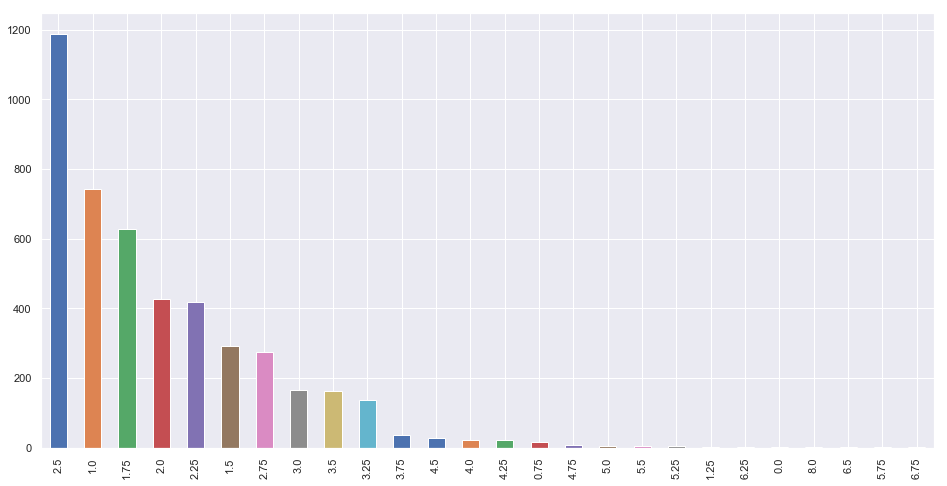

In [75]:
df["bathrooms"].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'price vs bedrooms')

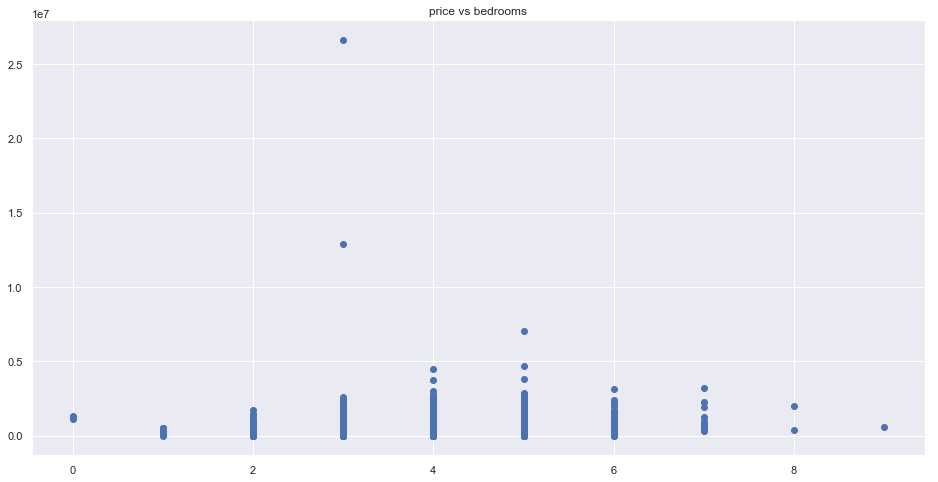

In [22]:
plt.scatter(df.bedrooms,df.price)
plt.title("price vs bedrooms")

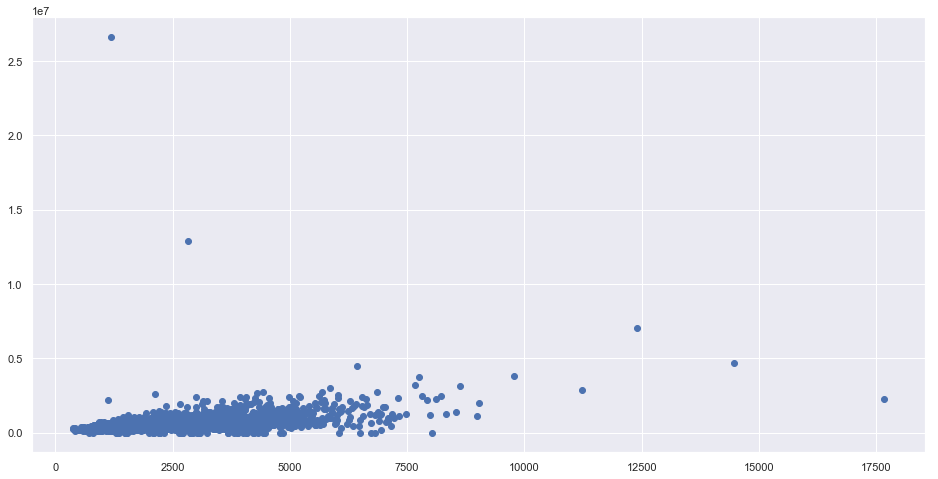

In [25]:
plt.scatter((df['sqft_living']+df['sqft_basement']),df['price'])

In [10]:
df.waterfront.unique()

array([0, 1], dtype=int64)

In [11]:
df['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

**Waterfront is binary categorical values.**  
**It has more number of false values**

In [13]:
print(len(df))
df.duplicated().sum()

4600


0

**There are no duplicate values in the dataset.**

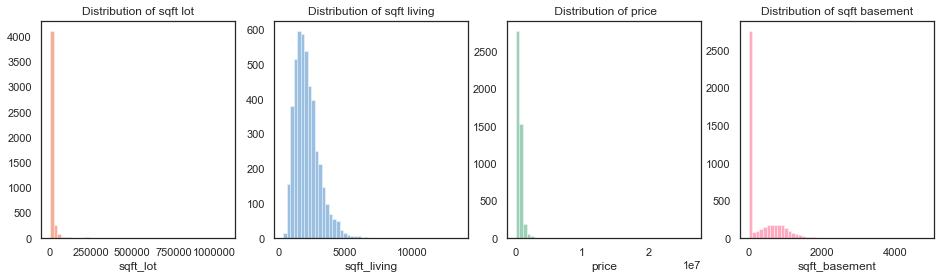

In [163]:
import seaborn as sns
sns.set_style('white')

f, axes = plt.subplots(ncols=4, figsize=(16,4))

# Lot Area: In Square Feet
sns.distplot(df['sqft_lot'], kde=False, color="#DF3A01", ax=axes[0]).set_title("Distribution of sqft lot")

# Sqft Living area distribution
sns.distplot(df['sqft_living'], kde=False, color="#045FB4", ax=axes[1]).set_title("Distribution of sqft living")

# House Value
sns.distplot(df['price'], kde=False, color="#088A4B", ax=axes[2]).set_title(" Distribution of price")


# # Sqft basement  area distribution
sns.distplot(df['sqft_basement'], kde=False, color="#FE2E64", ax=axes[3]).set_title("Distribution of sqft basement")


plt.show()

**sqft_lot,sqft_living,price,sqft_basement had left skewed. Values lie more on higher price range**

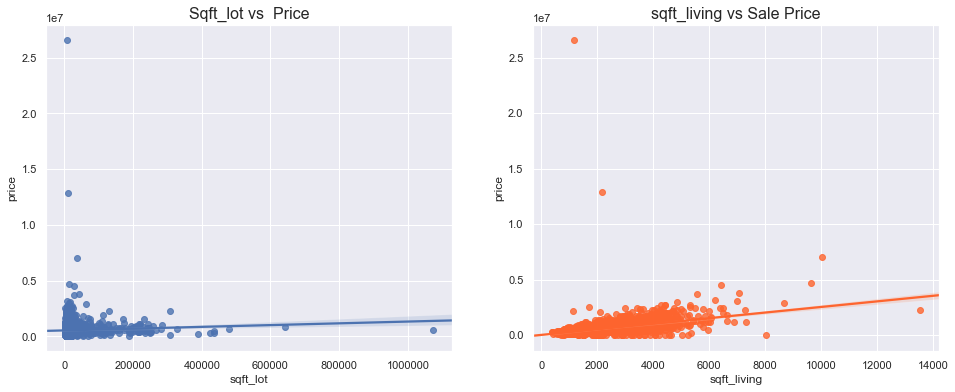

In [81]:
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = sns.regplot(x="sqft_lot", y="price", data=df)
ax.set_title("Sqft_lot vs  Price", fontsize=16)

plt.subplot(122)
ax1 = sns.regplot(x="sqft_living", y="price", data=df, color='#FE642E')
ax1.set_title("sqft_living vs Sale Price", fontsize=16)

plt.show()

**The graph does not show much linear relationship of sqft_lot and sqft_living with the housing prices.**

In [164]:
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [165]:
data = data.drop('date',1)
data = data.drop('city',1)
data = data.drop('street',1)
data = data.drop('country',1)
data = data.drop('statezip',1)

# Feature Extraction

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03358714 0.01904853 0.02452143 0.0327496  0.03088019 0.01760951
 0.00138251 0.00906279 0.03073583 0.03082492 0.02109863 0.15833292
 0.59016602]


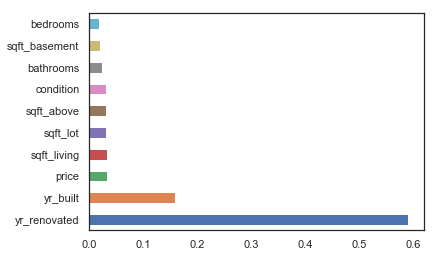

In [167]:
import pandas as pd
import numpy as np

#data = pd.read_csv("data.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

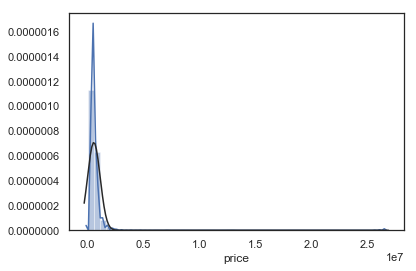

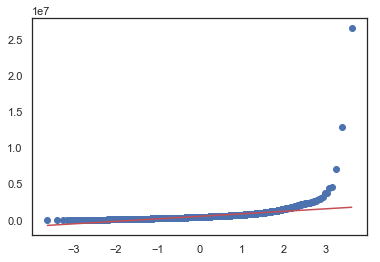

skewness for price: 24.790933
kurtosis  for price: 1044.352151


In [169]:
# kernel density plot
sns.distplot(df.price,fit=norm);
plt.title = ('price');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price']);
#QQ plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()
print("skewness for price: %f" % df['price'].skew())
print("kurtosis  for price: %f" % df ['price'].kurt())

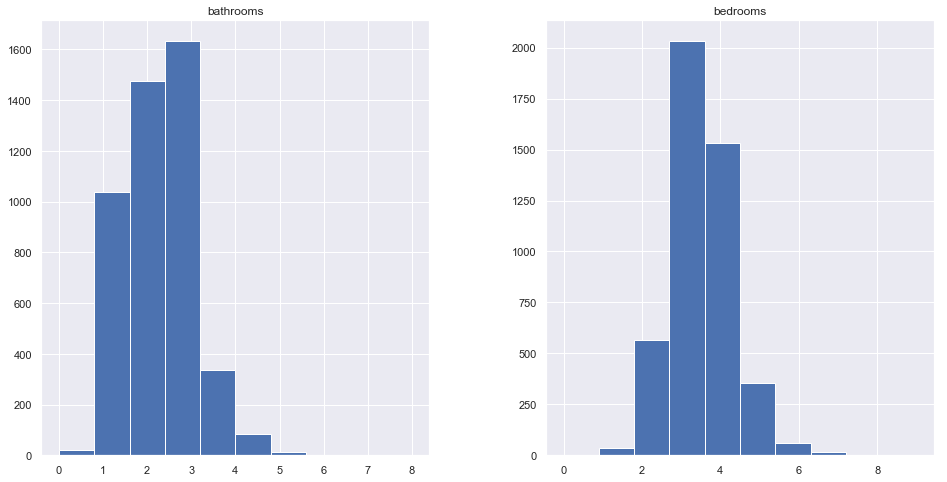

In [89]:
viz = df[['bathrooms','bedrooms']]
viz.hist()
plt.show()

In [131]:
int_features = df.dtypes[df.dtypes == "int64"].index
float_features = df.dtypes[df.dtypes == "float64"].index

# Check the skew of all numerical features
skewed_int_feats = df[int_features].apply(lambda x: skew(x.dropna()))
skewed_float_feats = df[float_features].apply(lambda x: skew(x.dropna()))

skewed_features = pd.concat([skewed_int_feats,skewed_float_feats])

print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness = skewness.sort_values('Skew', ascending = False)
skewness.head(15)


Skewness in numerical features: 



,Skew
price,24.782848
waterfront,11.679091
sqft_lot,11.303451
view,3.340497
sqft_living,1.722951
sqft_basement,1.642196
sqft_above,1.493723
condition,0.958755
bathrooms,0.615832
floors,0.551261


## Handling missing values

In [93]:
df.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool

**There are no missing values to be cleaned. The data is clean.**

## Finding Features

In [4]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


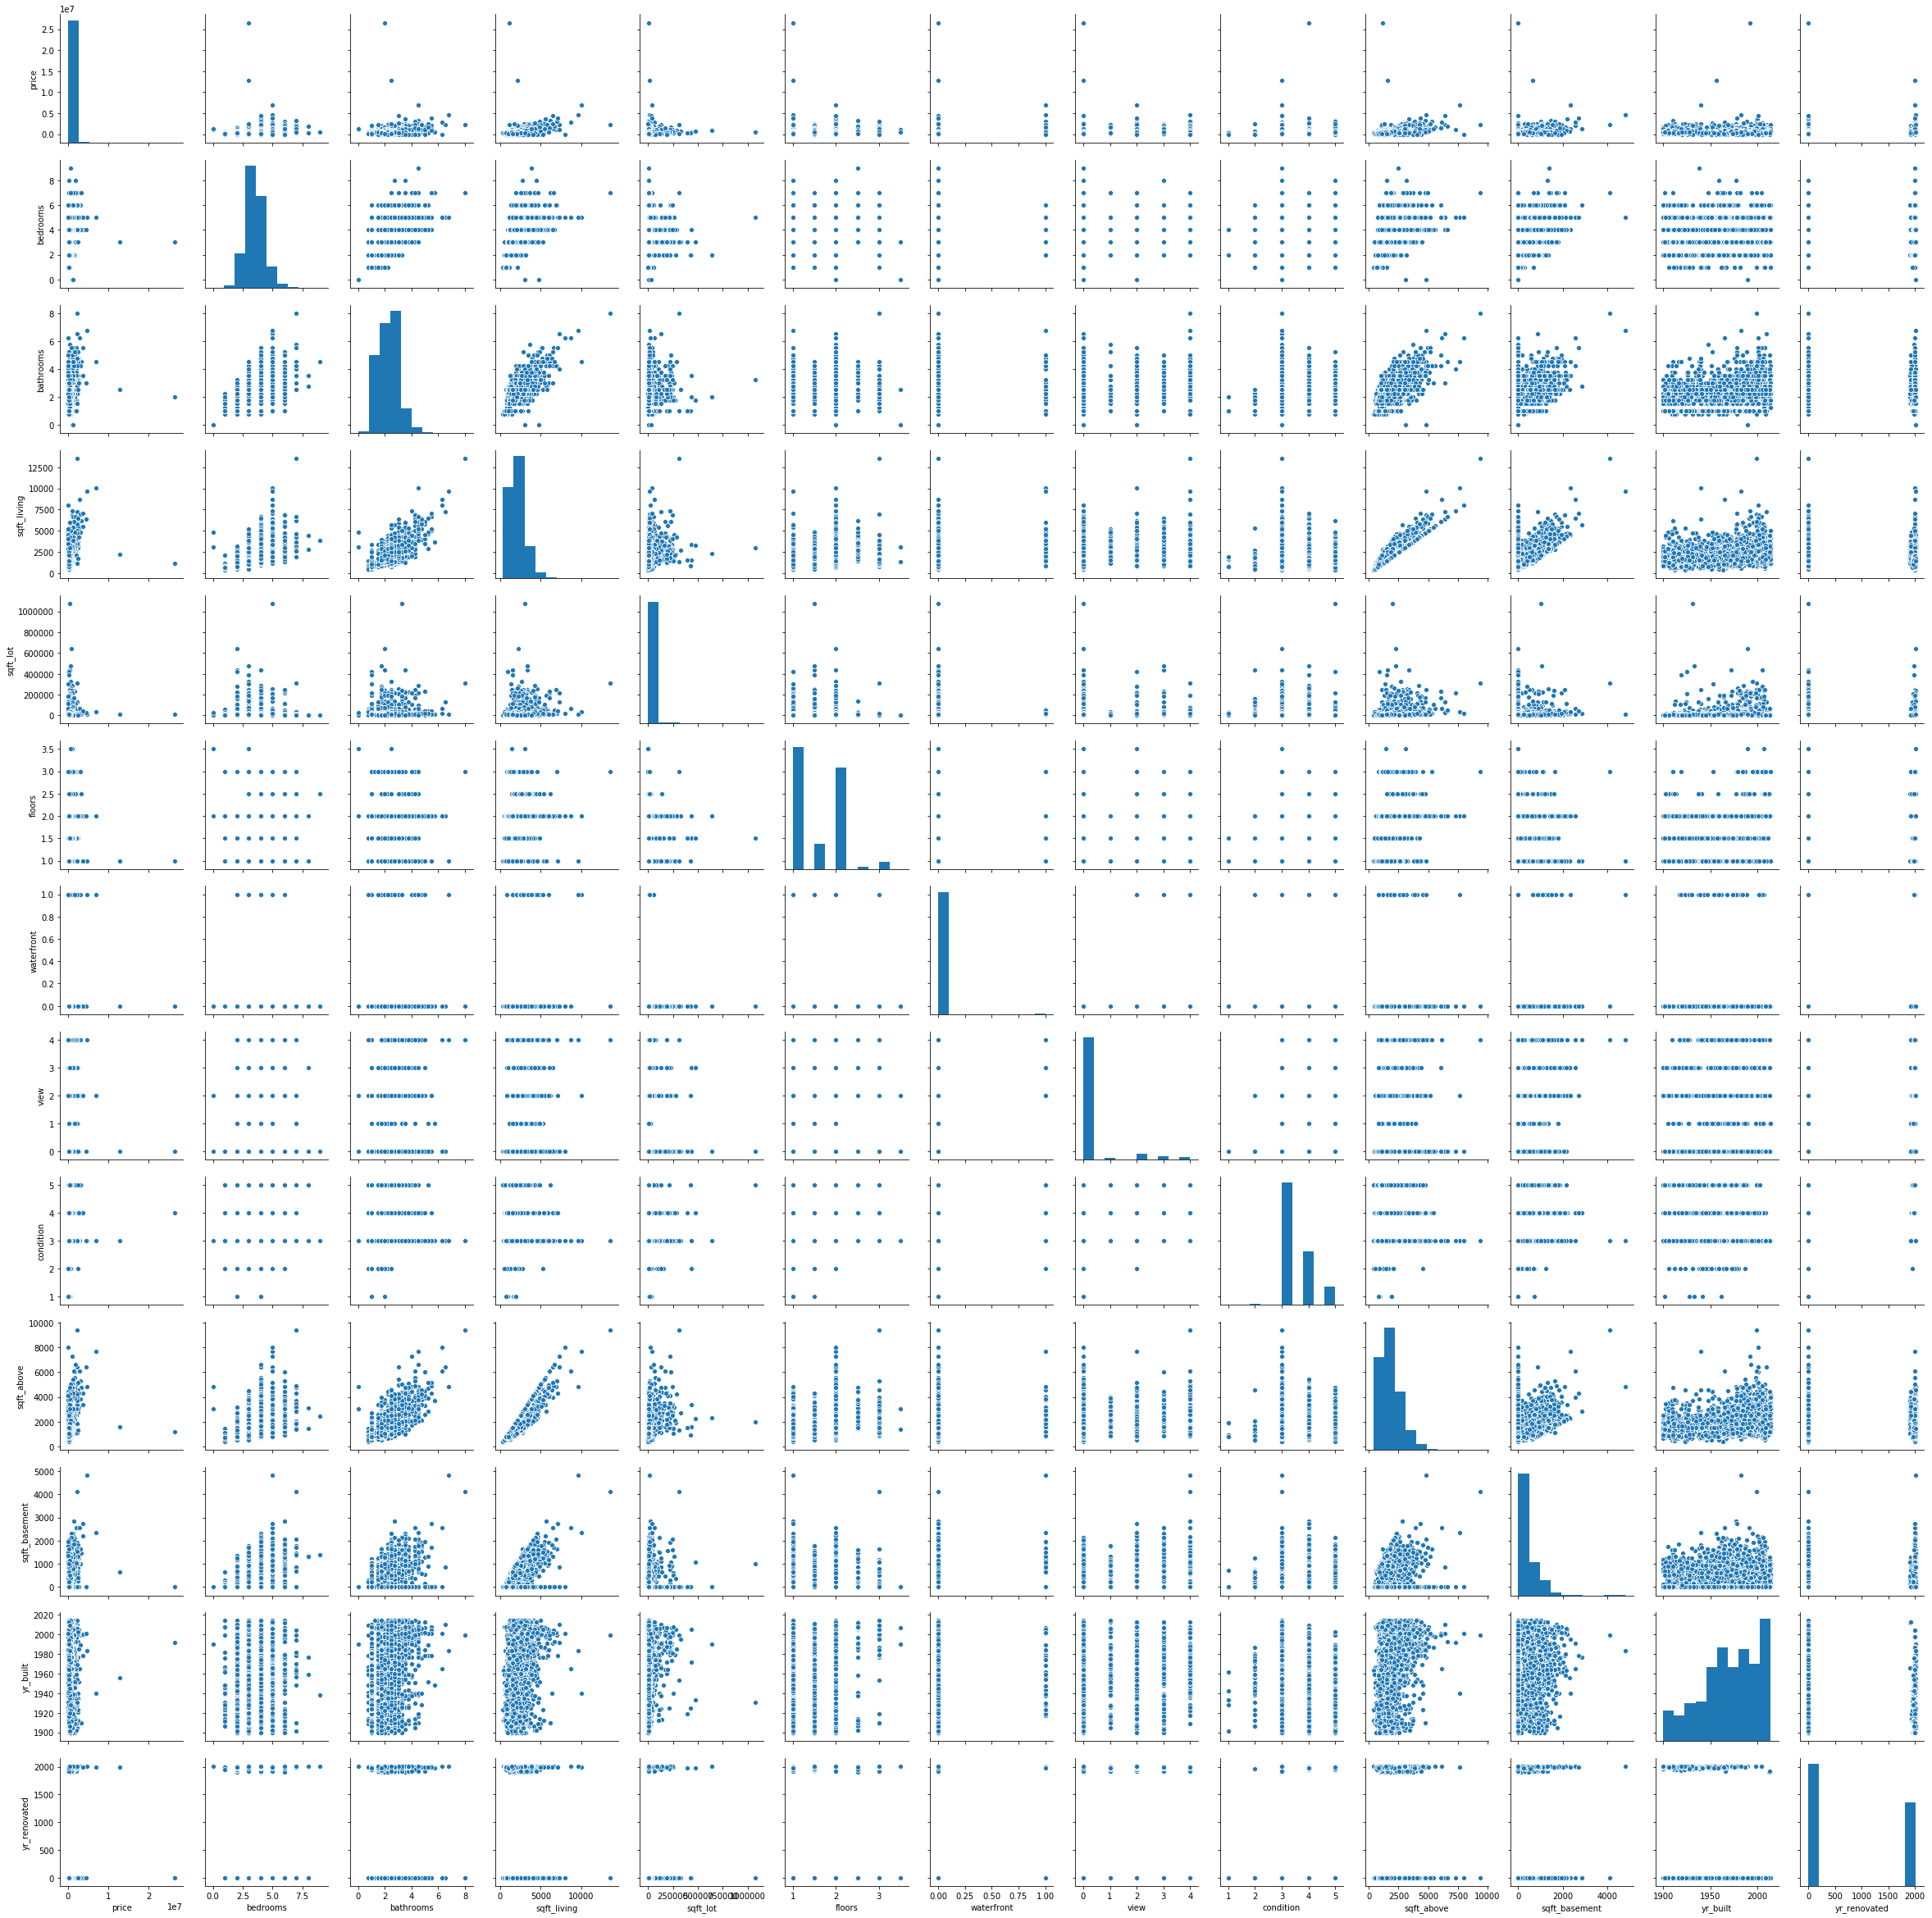

In [113]:
sns.pairplot(df)

**Some unusual correlations that seems like a causation to me rather than a correlation are:**     
- sqft_living vs sqft_above   
- sqft_above vs sqft_basement
- sqft_living vs bathrooms

In [5]:
df.corr().price

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

**Price has positive correlation with sqft_living,bathrooms,bedrooms,view,sqft_above,sqft_basement.   
Price has negative correlation with yr_renovated.**

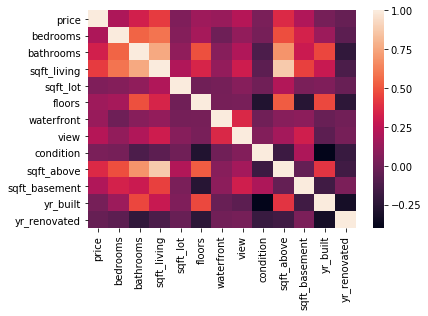

In [6]:
# check for any correlations between variables using heatmap
corr = df.corr()
sns.heatmap(corr)


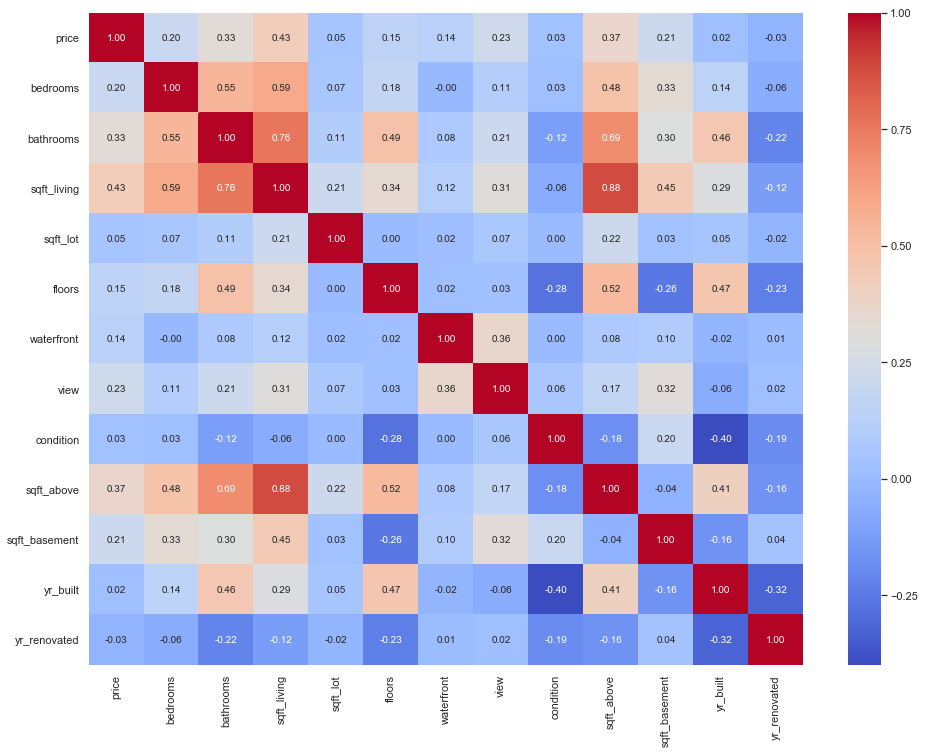

In [175]:
#Generated Heatmap to show correlation in visualisation
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

***

## Model One

**Implemented multiple linear regression model**  
**Target -    
price    
Predictors -
sqft_living,sqft_above,sqft_basement,bathrooms,waterfront**

In [177]:
X = df[["sqft_living","sqft_above","sqft_basement","bathrooms","waterfront"]]
y = df[["price"]]
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [178]:
# Fit the linear model
from sklearn import linear_model
model = linear_model.LinearRegression()
results = model.fit(X, y)
print(results)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [179]:
# Print the coefficients
print (results.intercept_, results.coef_)

[21658.98847321] [[ 1.09939990e+15 -1.09939990e+15 -1.09939990e+15  2.38737132e+03
   5.70839356e+05]]


In [180]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 0.588 which is decent enough for our model to be 
# predicted on these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     1638.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:27:46   Log-Likelihood:                -66950.
No. Observations:                4600   AIC:                         1.339e+05
Df Residuals:                    4596   BIC:                         1.339e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     167.4828      8.553     19.581      0.000     150.714     184.252
sqft_above       73.6556      8.481      8.685      0.000      57.029      90.283
sqft_basement    93.8272     11.266      8.328      0.000      71.740     115.914
bathrooms       1.07e+04   1.23e+04      0.868      0.385   -1.35e+04    3.49e+04
waterfront     5.667e+05   8.92e+04      6.354      0.000    3.92e+05    7.42e+05
==============================================================================
Omnibus:                    12602.441   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        522949816.062
Skew:                          33.779   Prob(JB):                         0.00
Kurtosis:                    1653.415   Cond. No.                     2.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.67e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [181]:
#Predicting without splitting the dataset into test and train.
ypred=results.predict()
print(ypred)

[339175.33736935 912553.03851211 486796.95524969 ... 752576.39399778
 545954.1844091  386046.01089784]


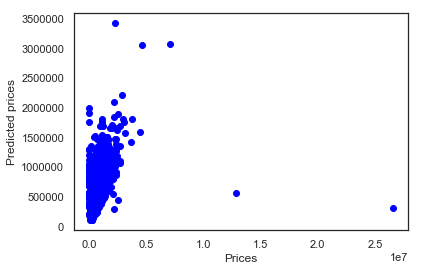

In [182]:
plt.scatter(y, ypred , color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()
# As we can see in this graph, the highest price of the diamond in the dataset is > 17500 and the predicted price is largely 
# scattered over the 10000-20000 range with a few outliers on the >20000. 

In [183]:
rmseFull = np.sqrt(mean_squared_error(y, ypred))
print("The root mean squared error is:",rmseFull)

The root mean squared error is: 506565.2152195538


In [184]:
y_m=np.mean(y)
print(rmseFull/y_m)
# The mean squared error is divided with the mean to calculate the coefficient of variation between the actual and the residual
# values. It is just a root mean squared value which helps us to normalize the rsme around the mean. 


price    0.917752
dtype: float64


In [185]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)
regressor.score(X,y)

0.19283745089021453

**RMSE of 506565.21 means that the model predicted an average of 506565.21 away from the true value while making predictions on the test data set. This is an under fitted model which means that the features does not provide enough information to make good predictions.**

**The model is 19.28% of the variability in Y can be explained using X.**

***

# Model 2

**Implemented multiple linear regression model**  
**Target -** 
- price  

**Predictors -** 
- sqft_living
- yr_built
- bathrooms
- bedrooms
- floors
- yr_renovated

In [186]:
X=df[["sqft_living","yr_built","bathrooms","bedrooms","floors","yr_renovated"]]
y=df[["price"]]
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [188]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 0.587 which is decent enough for our model to be 
# predicted on these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     1087.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:30:17   Log-Likelihood:                -66956.
No. Observations:                4600   AIC:                         1.339e+05
Df Residuals:                    4594   BIC:                         1.340e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    272.3298     12.713     21.422      0.000     247.407     297.253
yr_built        42.1995     18.483      2.283      0.022       5.963      78.436
bathrooms     1.997e+04   1.64e+04      1.221      0.222   -1.21e+04     5.2e+04
bedrooms     -5.245e+04   1.04e+04     -5.022      0.000   -7.29e+04    -3.2e+04
floors        3707.9946   1.63e+04      0.227      0.820   -2.83e+04    3.57e+04
yr_renovated    18.4565      7.900      2.336      0.020       2.968      33.945
==============================================================================
Omnibus:                    12595.462   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        519269257.901
Skew:                          33.732   Prob(JB):                         0.00
Kurtosis:                    1647.591   Cond. No.                     7.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [190]:
model = linear_model.LinearRegression()
results = model.fit(X_train, Y_train)
pred_train=results.predict(X_train)
pred_test=results.predict(X_test)
print(results.score(X_test,Y_test))
print(results.score(X_train,Y_train))

0.49096120851135955
0.17869366307674106


In [191]:
# Print the coefficients
print (results.intercept_, results.coef_)

[5975676.83091752] [[ 2.56922733e+02 -3.03091272e+03  7.99797107e+04 -6.80640010e+04
   3.94261477e+04  8.03319670e-01]]


In [192]:
#Predicting training set for price column 

print(pred_train)

[[232001.34204996]
 [805091.37198557]
 [539401.13687623]
 ...
 [244407.45440525]
 [619105.81859839]
 [384869.12855217]]


In [193]:
#Predicting testing set for price column
#ypred= results.predict(pred_test)
print(pred_test)

[[ 674465.35119301]
 [ 453146.53590731]
 [ 949316.04944554]
 [ 439736.25591737]
 [ 383226.26256101]
 [ 583451.49083232]
 [ 222130.1044412 ]
 [ 180608.83546309]
 [ 551712.15352327]
 [ 431583.6527947 ]
 [ 719366.73498844]
 [ 497348.84399444]
 [ 459813.72403232]
 [ 984189.84388214]
 [ 917335.3208304 ]
 [ 396233.27647477]
 [1037584.72686735]
 [ 699656.36789216]
 [ 939870.41271036]
 [ 572980.69242424]
 [ 848148.81728533]
 [ 776551.17159352]
 [ 629158.42267693]
 [ 819698.6224434 ]
 [ 715530.71051085]
 [1004222.06179977]
 [ 602673.76627212]
 [ 481692.6835209 ]
 [ 305748.10910456]
 [ 344287.41614504]
 [ 219428.04969154]
 [ 621875.93095481]
 [ 379056.95097509]
 [ 291777.28009153]
 [ 498932.85823638]
 [ 544357.57528968]
 [ 299300.16806808]
 [ 655829.01272526]
 [ 386075.61012591]
 [ 347490.2071978 ]
 [ 909795.36902097]
 [ 299306.7021606 ]
 [ 694048.03653876]
 [1223502.92705328]
 [ 760296.5953678 ]
 [ 505411.38863696]
 [ 558027.01382671]
 [ 733170.79912251]
 [ 866102.59221141]
 [ 253785.27525   ]


In [195]:
rmsetrain = np.sqrt(mean_squared_error(Y_train, pred_train))
print(rmsetrain)
rmsetest = np.sqrt(mean_squared_error(Y_test, pred_test))
print(rmsetest)
#Even the rmse's vary much.

544921.0208653468
269794.91243232193


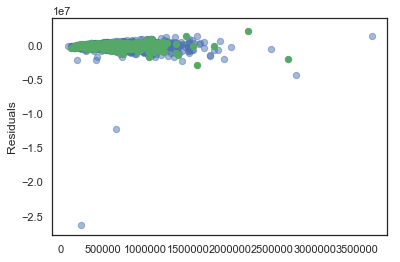

In [198]:
plt.scatter(pred_train, pred_train - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - Y_test, c='g', s=40)
#plt.title('Residual Plot using training(blue) and testing(green) data')
plt.ylabel('Residuals')
plt.show()
#This plot shows that the predicted values lie in the same vicinity as the tested values which is very much in 
#sync according to the independent variables that are used for prediction.
# here, we can also see that the predicted values are very close the real values which means that to predict the price of the houses 
# depends on the independent variables


In [199]:
rmseFull = np.sqrt(mean_squared_error(Y_test,pred_test))
print("The root mean squared error is:",rmseFull)

The root mean squared error is: 269794.91243232193


In [200]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.49096120851135955

**RMSE of 269794.91 means that the model predicted an average of 269794.9 away from the true value while making predictions on the test data set. This is an under fitted model which means that the features does not provide enough information to make good predictions.**

**The model is 49.09% of the variability in Y can be explained using X.**

***

## Model 3

**Implemented multiple linear regression model**  
**Target -** 
- price  

**Predictors -** 
- sqft_above
- sqft_basement
- view
- sqft_lot
- waterfront
- condition

In [201]:
X=df[['sqft_above', 'sqft_basement', 'view', 'sqft_lot', 'waterfront', 'condition']]
y=df[['price']]

In [202]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [204]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 0.592 which is decent enough for our model to be 
# predicted on these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1112.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:33:37   Log-Likelihood:                -66925.
No. Observations:                4600   AIC:                         1.339e+05
Df Residuals:                    4594   BIC:                         1.339e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_above      230.7341      7.872     29.310      0.000     215.301     246.167
sqft_basement   222.6955     17.274     12.892      0.000     188.830     256.561
view           6.269e+04   1.09e+04      5.741      0.000    4.13e+04    8.41e+04
sqft_lot         -0.6698      0.212     -3.154      0.002      -1.086      -0.253
waterfront      3.93e+05   9.45e+04      4.159      0.000    2.08e+05    5.78e+05
condition      1.647e+04   4662.167      3.533      0.000    7330.213    2.56e+04
==============================================================================
Omnibus:                    12677.297   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        543871436.846
Skew:                          34.313   Prob(JB):                         0.00
Kurtosis:                    1686.116   Cond. No.                     4.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [206]:
model = linear_model.LinearRegression()
results = model.fit(X_train, Y_train)
pred_train=results.predict(X_train)
pred_test=results.predict(X_test)
print(results.score(X_test,Y_test))
print(results.score(X_train,Y_train))

0.48964287437451326
0.17481761905242166


In [207]:
# Print the coefficients
print (results.intercept_, results.coef_)

[-144987.38757857] [[ 2.43666840e+02  2.16908587e+02  6.10602688e+04 -7.69972460e-01
   4.22527913e+05  5.20788578e+04]]


In [208]:
#Predicting training set for price column 

print(pred_train)

[[367534.41516569]
 [905563.9362101 ]
 [597597.25742722]
 ...
 [243777.24187334]
 [614635.62655254]
 [560824.22520514]]


In [209]:
rmsetrain = np.sqrt(mean_squared_error(Y_train, pred_train))
print(rmsetrain)
rmsetest = np.sqrt(mean_squared_error(Y_test, pred_test))
print(rmsetest)
#Even the rmse's do not vary much.

546205.3478257431
270144.0507075492


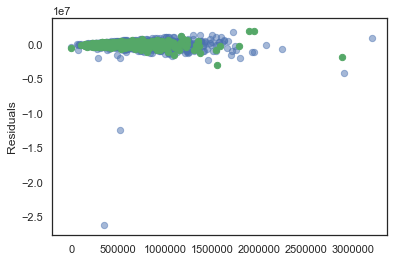

In [210]:
plt.scatter(pred_train, pred_train - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - Y_test, c='g', s=40)
#plt.title('Residual Plot using training(blue) and testing(green) data')
plt.ylabel('Residuals')
plt.show()
#This plot shows that the predicted values lie in the same vicinity as the tested values which is very much in 
#sync according to the independent variables that are used for prediction.
# here, we can also see that the predicted values are very close the real values which means that to predict the price of the house


In [211]:
rmseFull = np.sqrt(mean_squared_error(Y_test,pred_test))
print("The root mean squared error is:",rmseFull)

The root mean squared error is: 270144.0507075492


In [212]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.48964287437451326

**RMSE of 270144.05 means that the model predicted an average of 270144.05 away from the true value while making predictions on the test data set. This is an under fitted model which means that the features does not provide enough information to make good predictions.**

**The model is 48.96% of the variability in Y can be explained using X.**

***

# Part C - Multi-colinearity and step-wise regression

# Checking for VIF for eliminating multicollinearity and overfitting

In [154]:
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
y= df['price']
X=df.drop(['price','date','city','street','statezip','country'], axis=1)
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

R2 0.4735975029139509
Mean RMSE 390649.162583538


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          5.03e-235
Time:                        19:06:57   Log-Likelihood:                -66877.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4588   BIC:                         1.339e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.584e+06   6.85e+05      6.689      0.000    3.24e+06    5.93e+06
bedrooms      -5.804e+04   1.05e+04     -5.531      0.000   -7.86e+04   -3.75e+04
bathrooms       5.72e+04    1.7e+04      3.363      0.001    2.39e+04    9.05e+04
sqft_living     164.4116      9.779     16.813      0.000     145.241     183.582
sqft_lot         -0.6912      0.213     -3.250      0.001      -1.108      -0.274
floors         3.981e+04   1.87e+04      2.129      0.033    3143.011    7.65e+04
waterfront     3.553e+05   9.38e+04      3.789      0.000    1.71e+05    5.39e+05
view            4.57e+04    1.1e+04      4.167      0.000    2.42e+04    6.72e+04
condition      3.184e+04    1.3e+04      2.441      0.015    6269.622    5.74e+04
sqft_above       97.0378      9.714      9.989      0.000      77.993     116.082
sqft_basement    67.3738     13.661      4.932      0.000      40.591      94.157
yr_built      -2378.2101    341.615     -6.962      0.000   -3047.939   -1708.481
yr_renovated      6.5727      8.634      0.761      0.447     -10.355      23.500
==============================================================================
Omnibus:                    12845.801   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        601962895.545
Skew:                          35.530   Prob(JB):                         0.00
Kurtosis:                    1773.770   Cond. No.                     5.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.35e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

C:\Users\owner\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,25.000000,bedrooms
1,25.900000,bathrooms
2,inf,sqft_living
3,1.300000,sqft_lot
4,16.600000,floors
5,1.200000,waterfront
6,1.500000,view
7,30.700000,condition
8,inf,sqft_above
9,inf,sqft_basement


In [172]:
#Implementing VIF (Variance Inflation Factor) to check whether the selected independent variables are correct for prediction 
# or not. Also, 'sqft-living', 'sqft-lot' and 'bathrooms' had very close levels of co-relation with price which makes us to investigate whether all 
# three are important or not.
indep=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'
,'yr_built','yr_renovated']
X=df[indep]

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

thresh=10 #Setting a threshold of 10 as a sign of serious and sever multi-collinearity
for i in np.arange(0,len(indep)):
    vif=[variance_inflation_factor(X[indep].values,ix)
    for ix in range(X[indep].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print( X[indep].columns[maxloc] )
        del indep[maxloc]
    else:
        break
        
    print ('Final variables: ', indep)

C:\Users\owner\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif : [25.018098910237427, 25.893636513144976, inf, 1.2586367550508162, 16.58473289550741, 1.1636080597240972, 1.463516013063879, 30.667007757514785, inf, inf, 64.50812382081399, 1.9288393229498095]
sqft_living
Final variables:  ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
vif : [25.018098910237427, 25.893636513144976, 1.2586367550508164, 16.58473289550741, 1.1636080597240972, 1.4635160130638785, 30.667007757514888, 14.555921988851265, 2.6719035432575478, 64.50812382081399, 1.9288393229498095]
yr_built
Final variables:  ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated']
vif : [23.118545221524958, 25.32102699480897, 1.255725110391418, 13.716795243436955, 1.1628076780225223, 1.4553792415743991, 11.45505647922459, 14.468636394239246, 2.635956802845666, 1.6334684576586445]
bathrooms
Final variables:  ['bedrooms', 'sq

In [157]:
X[indep].head(5)
# After performing VIF on the chosen variables, we see that the VIF for 'x' and 'z' surpass the threshold of 10 and leaves us 
# only 'carat' and 'y'. This selection is somewhat in sync with the OLS table where a unit increase in 'carat' and 'y' (width)
# of the diamond results in the increase in price of the diamond. Whereas, 'x' and 'z' result in the decrease in the price of the
# diamond.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


1) Is there any multi-colinearity in the model?      
Yes there is multi-colinearity in the model which is shown by Variance Inflation Factor and Heatmap.   
Some significant multi-colinearity are   
- sqft_living vs sqft_above   
- sqft_above vs sqft_basement
- sqft_living vs bathrooms     

2) In the multiple regression models are predictor variables independent of all the other predictor variables?  
No, There is slight dependency between predictors.  

3) In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
Most Significant predictors-  
- bedrooms
- sqft_basement   
- bathrooms   
- condition   
- sqft_living   
- sqft_above   
- yr_renovated   

4) Cross-validate the models. How well did they do?     
Yes, Completed the cross validation process and the error reduced after increasing the number of folds.

# Test the model fit

# Cross validating using sckikit

In [173]:
#R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to
# represent the model's ability to generalize. For this we perform cross validation.

In [223]:
from sklearn.model_selection import KFold
H= df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'
,'yr_built','yr_renovated']]
G= df['price']
kf = KFold(n_splits=10) # Define the split - into 10 folds 
kf.get_n_splits(H) # returns the number of splitting iterations in the cross-validator
print(kf)


KFold(n_splits=10, random_state=None, shuffle=False)


In [221]:
test= list()
from sklearn.linear_model import LinearRegression
for train_index, test_index in kf.split(H):
    
    H_train, H_test = H.iloc[train_index], H.iloc[test_index]
    G_train, G_test = G.iloc[train_index], G.iloc[test_index]    
    regressor = LinearRegression()
    regressor.fit(H_train, G_train)
    G_pred = regressor.predict(H_test)
    print("TRAIN", train_index, "TEST", test_index)
    evs = np.sqrt(mean_squared_error(G_test, G_pred))
    print(evs)
    test.append(evs)
print(evs)

TRAIN [ 460  461  462 ... 4597 4598 4599] TEST [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234

TRAIN [   0    1    2 ... 4597 4598 4599] TEST [2300 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313
 2314 2315 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327
 2328 2329 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341
 2342 2343 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354 2355
 2356 2357 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369
 2370 2371 2372 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383
 2384 2385 2386 2387 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397
 2398 2399 2400 2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411
 2412 2413 2414 2415 2416 2417 2418 2419 2420 2421 2422 2423 2424 2425
 2426 2427 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439
 2440 2441 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451 2452 2453
 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467
 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479 2480 2481
 2482 2483 2484 2485 2486 2487

In [222]:
kfold_avg=np.mean(test)
kfold_avg

352978.7423334262

# Part E - Regularization

## Ridge Regression

In [133]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,Y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,Y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.

0.48358193919830605

In [134]:
print(ridge.score(X_train,Y_train))
print(ridge.score(X_test,Y_test))

0.17337419639474527
0.48358193919830605


Text(0, 0.5, 'Predicted price: ')

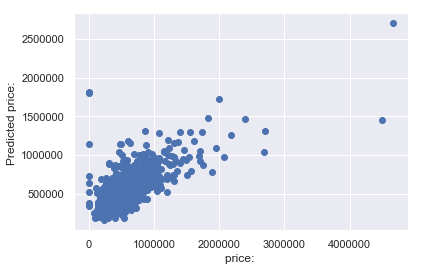

In [136]:
plt.scatter(Y_test, ridge_pred)
plt.xlabel("price: ")
plt.ylabel("Predicted price: ")
#plt.title("Ridge Regression - price vs Predicted price:")

## Lasso Regression

In [248]:
X=df[['sqft_above', 'sqft_basement', 'view', 'sqft_lot', 'waterfront', 'condition']]
y=df[['price']]
lasso=Lasso(alpha=.1)
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

[ 2.45827853e+02  2.21278981e+02  5.97738228e+04 -6.97844758e-01
  3.95357217e+05  5.00795621e+04]


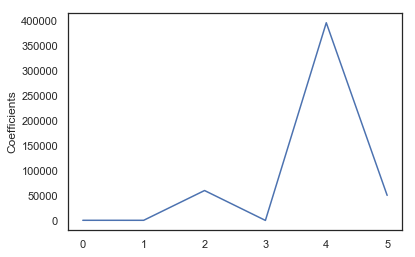

In [249]:
_ =plt.plot(range(len(X.T)),lasso_coef)
_ =plt.xticks(range(len(X.T)), X.T)
_ =plt.ylabel('Coefficients')
plt.show()
#As we can see from the lasso regression, it is very evident that "view" which is at the 3rd position of the X plays a huge factor
# in the increase of the price of the house along with the breadth ("y") which is at position 0 of X. 

# Part D - Interaction effects

In [240]:
#Created term Rooms which has bedrooms and bathrooms count
df['Rooms']=df['bedrooms' ]*df['bathrooms']
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'
,'yr_built','yr_renovated','Rooms']
X = df[features]
Y = df['price']

In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3680, 13)
(920, 13)
(3680,)
(920,)


In [237]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

61455063256.52748


In [238]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     565.9
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:37:35   Log-Likelihood:                -66899.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4588   BIC:                         1.339e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -6.693e+04   1.99e+04     -3.357      0.001   -1.06e+05   -2.78e+04
bathrooms      -170.5396   3.32e+04     -0.005      0.996   -6.53e+04     6.5e+04
sqft_living     168.5361      9.880     17.058      0.000     149.167     187.906
sqft_lot         -0.7120      0.214     -3.331      0.001      -1.131      -0.293
floors         3.495e+04   1.88e+04      1.854      0.064   -1998.607    7.19e+04
waterfront     3.708e+05   9.42e+04      3.936      0.000    1.86e+05    5.56e+05
view           5.116e+04    1.1e+04      4.654      0.000    2.96e+04    7.27e+04
condition       7.22e+04   1.16e+04      6.198      0.000    4.94e+04     9.5e+04
sqft_above       88.6568      9.749      9.094      0.000      69.544     107.770
sqft_basement    79.8792     13.595      5.875      0.000      53.226     106.533
yr_built        -76.3240     42.341     -1.803      0.072    -159.333       6.685
yr_renovated     27.0676      8.101      3.341      0.001      11.185      42.950
Rooms          6981.3121   8132.331      0.858      0.391   -8961.969    2.29e+04
==============================================================================
Omnibus:                    12756.256   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        571091512.567
Skew:                          34.878   Prob(JB):                         0.00
Kurtosis:                    1727.744   Cond. No.                     2.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [239]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()

0.4563074597242842

***

In [241]:
#Created term total which has sqft_above and sqft_basement count
df['total']=df['sqft_above']*df['sqft_basement']
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'
,'total']
X = df[features]
Y = df['price']

In [242]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3680, 11)
(920, 11)
(3680,)
(920,)


In [243]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

63042344656.533745


In [244]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     681.5
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:44:09   Log-Likelihood:                -66895.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4590   BIC:                         1.339e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.763e+04   1.01e+04     -4.730      0.000   -6.74e+04   -2.79e+04
bathrooms      1.572e+04   1.61e+04      0.977      0.328   -1.58e+04    4.73e+04
sqft_living     118.1255     14.638      8.070      0.000      89.428     146.823
sqft_lot         -0.7886      0.213     -3.695      0.000      -1.207      -0.370
floors         5503.9243   1.71e+04      0.323      0.747   -2.79e+04    3.89e+04
waterfront     3.377e+05   9.42e+04      3.586      0.000    1.53e+05    5.22e+05
view           5.122e+04    1.1e+04      4.673      0.000    2.97e+04    7.27e+04
condition      4.907e+04   7197.151      6.818      0.000     3.5e+04    6.32e+04
sqft_above      117.1521     11.216     10.445      0.000      95.164     139.140
sqft_basement     0.9734     21.420      0.045      0.964     -41.020      42.967
total             0.0599      0.012      5.082      0.000       0.037       0.083
==============================================================================
Omnibus:                    12738.792   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        567250080.262
Skew:                          34.750   Prob(JB):                         0.00
Kurtosis:                    1721.934   Cond. No.                     8.20e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [245]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()

0.5201342432777067

1) Is there a significant synergy (interaction effect) in either of your tested product terms?      

After adding Rooms(bathrooms,bedrooms) the accuracy is 45.63%
After adding Total(sqft_above,sqft_basement) the accuracy is 52.01%
There is slight change in interaction effect after adding Total.

***

## Answer the following questions

1) Is the relationship significant?        
Yes, the relationship between the dependent variable 'price' and the independent variables 'sqft_living',sqft_above','bedrooms' and 'sqft_basement' is significant as we have p-value of zero which shows that the slope is not zero for any random data and the model will predict the price of the houses based on the input of the independent variables.

2) Are any model assumptions violated?         
Yes, The dependent variable does not have significant linear relationship with the independent variables.    
There is multicolinearity between independent variables.     
The model has been assumed based on the co-relation obtained between the independent and dependent variables.        

3) Does the model make sense? Interpret the meaning of each independent variable.      
No, The model is not making much sense as the rmse values are differing for the training and testing dataset.  
Maximum accuracy obtained is 49.09% which is less to make a proper prediction.

4) Cross-validate the model. How well did it do?     
Yes, Completed the cross validation process and the error reduced after increasing the number of folds.


5) Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  

| Model  | AIC | BIC | Adjusted R square | Accuracy |
| --- | --- | --- | --- | --- |
| Model 1 | 1.339e+05 | 1.339e+05 | 0.587 | 19.28% |
| --- | --- | --- | --- | --- |
| Model 2 | 0.339e+05 | 1.340e+05 | 0.586 | 49.09% |
| --- | --- | --- | --- | --- |
| Model 3 | 1.339e+05 | 1.339e+05 | 0.592 | 48.96% |
| --- | --- | --- | --- | --- |

Model 2 performs better giving more accuracy.




***

# Contribution

Self- 70%
External- 30%
    

# Citation

- https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa
- https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6   
- https://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/

# License

Copyright 2019  **Apurva Nivargi**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.